With pyforest you can use all your favorite Python libraries without importing them before. If you use a package that is not imported yet, pyforest imports the package for you and adds the code to the first Jupyter cell. If you don't use a library, it won't be imported.

In [81]:
import pyforest
import warnings
warnings.filterwarnings('ignore')

In [82]:
df=pd.read_table('IndianLiverPatientData.txt',names=['Age','Gender', 'Total_Bilirubin', 'Direct_Blirubin', 'Alkaline_Phosphotaso',
'Alamine_Aminotransferase', 'Aspartate_Aminotransferase','Total_Protein', 'Albumin','Albumin_and_Globulin_Ratio', 'Class'])

<IPython.core.display.Javascript object>

In [83]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Blirubin,Alkaline_Phosphotaso,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protein,Albumin,Albumin_and_Globulin_Ratio,Class
1,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,No
2,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,No
3,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,No
4,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,No
5,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,No


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 1 to 583
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      563 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Blirubin             583 non-null    float64
 4   Alkaline_Phosphotaso        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protein               568 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Class                       583 non-null    object 
dtypes: float64(5), int64(4), object(2)
memory usage: 54.7+ KB


In [85]:
df.isnull().sum()

Age                            0
Gender                        20
Total_Bilirubin                0
Direct_Blirubin                0
Alkaline_Phosphotaso           0
Alamine_Aminotransferase       0
Aspartate_Aminotransferase     0
Total_Protein                 15
Albumin                        0
Albumin_and_Globulin_Ratio     4
Class                          0
dtype: int64

## Handiling MissingData

In [86]:
df['Albumin_and_Globulin_Ratio']=df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean())

In [87]:
df['Total_Protein'] =df['Total_Protein'].fillna(df['Total_Protein'].mean())

In [88]:
df['Gender']=df['Gender'].fillna(np.random.choice(['Male','Female']))

<IPython.core.display.Javascript object>

In [89]:
df['Gender'] = df['Gender'].map({'Male': 1,'Female': 0})

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 1 to 583
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Blirubin             583 non-null    float64
 4   Alkaline_Phosphotaso        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protein               583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Class                       583 non-null    object 
dtypes: float64(5), int64(5), object(1)
memory usage: 54.7+ KB


In [91]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Blirubin,Alkaline_Phosphotaso,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protein,Albumin,Albumin_and_Globulin_Ratio,Class
1,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,No
2,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,No
3,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,No
4,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,No
5,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,No


In [92]:
a=df.corr()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

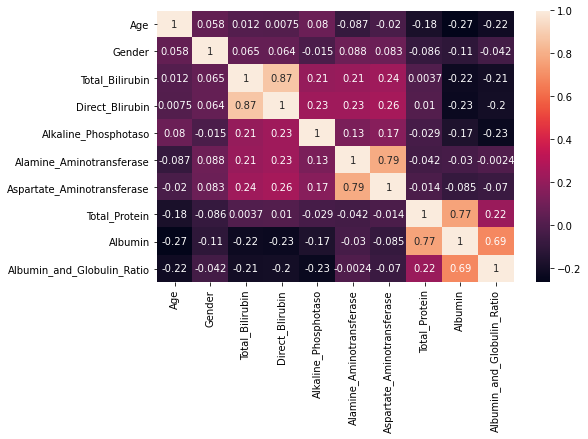

In [93]:
plt.figure(figsize=(8,5))
sns.heatmap(a,annot=True)

In [94]:
X=df.drop('Class',axis=1)

In [95]:
y=df.Class

# checking  skewness

In [119]:
#X.hist(figsize=(13,10))
#plt.show()

In [120]:
#X_new=X.drop(['Age','Albumin','Total_Protein'],axis=1)

In [121]:
#X_skew=np.log1p(X_new)
#X_skew.hist()

In [122]:
#X=pd.concat([X_skew,X_new],axis=1)

In [123]:
#X.columns

# Preprocessing

In [105]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

# Spilting

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=42)

<IPython.core.display.Javascript object>

In [107]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()

In [108]:
Y_train=lb.fit_transform(Y_train)
Y_test=lb.fit_transform(Y_test)

# Model building

In [109]:
def models(X_train,Y_train):
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression()
    log.fit(X_train,Y_train)
    
    
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=8)
    knn.fit(X_train,Y_train)
    
    
    from sklearn.svm import SVC
    svc_lin=SVC(kernel='poly')
    svc_lin.fit(X_train,Y_train)
    
    
    from sklearn.svm import SVC
    svc_rbf=SVC(kernel='rbf')
    svc_rbf.fit(X_train,Y_train)
    
    
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='gini',max_depth=10)
    tree.fit(X_train,Y_train)
    
    
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,ccp_alpha=0.006)
    forest.fit(X_train,Y_train)
    
        
        
        #print trainning accuracy
    print('[0]Logistic Regression Training Accuracy:',log.score(X_train,Y_train))
    print('[1]knn Training Accuracy:' ,knn.score(X_train,Y_train))  
    print('[2]svc_rbf Training Accuracy:', svc_rbf.score(X_train,Y_train))
    print('[3]svc-lin Training Accuracy:' ,svc_lin.score(X_train,Y_train)) 
    print('[4]decision tee Training Accuracy:', tree.score(X_train,Y_train))  
    print('[5]random forest Training Accuracy:', forest.score(X_train,Y_train)) 
    
    return log, knn, svc_rbf, svc_lin, tree, forest
  

In [110]:
model=models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.7181372549019608
[1]knn Training Accuracy: 0.7745098039215687
[2]svc_rbf Training Accuracy: 0.7058823529411765
[3]svc-lin Training Accuracy: 0.7107843137254902
[4]decision tee Training Accuracy: 0.8872549019607843
[5]random forest Training Accuracy: 0.8823529411764706


In [111]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [112]:
for i in range(len(model)):
    cm=confusion_matrix(Y_test,model[i].predict(X_test))
    rc=roc_auc_score(Y_test,model[i].predict(X_test))
    ac=accuracy_score(Y_test,model[i].predict(X_test))
    
    
    print(model[i],'\n''Accuracy: ',ac,sep=' ')
    
    print(cm)
    
    print('roc_auc_score:' , rc,'\n' "  ")
    

LogisticRegression() 
Accuracy:  0.7257142857142858
[[112  16]
 [ 32  15]]
roc_auc_score: 0.5970744680851064 
  
KNeighborsClassifier(n_neighbors=8) 
Accuracy:  0.68
[[106  22]
 [ 34  13]]
roc_auc_score: 0.5523603723404256 
  
SVC() 
Accuracy:  0.7314285714285714
[[128   0]
 [ 47   0]]
roc_auc_score: 0.5 
  
SVC(kernel='poly') 
Accuracy:  0.72
[[126   2]
 [ 47   0]]
roc_auc_score: 0.4921875 
  
DecisionTreeClassifier(max_depth=10) 
Accuracy:  0.6571428571428571
[[103  25]
 [ 35  12]]
roc_auc_score: 0.5300033244680851 
  
RandomForestClassifier(ccp_alpha=0.006, n_estimators=10) 
Accuracy:  0.6971428571428572
[[107  21]
 [ 32  15]]
roc_auc_score: 0.5775432180851063 
  


# Post pruning decision trees with cost complexity pruning

### Actual Tree (without pruning)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

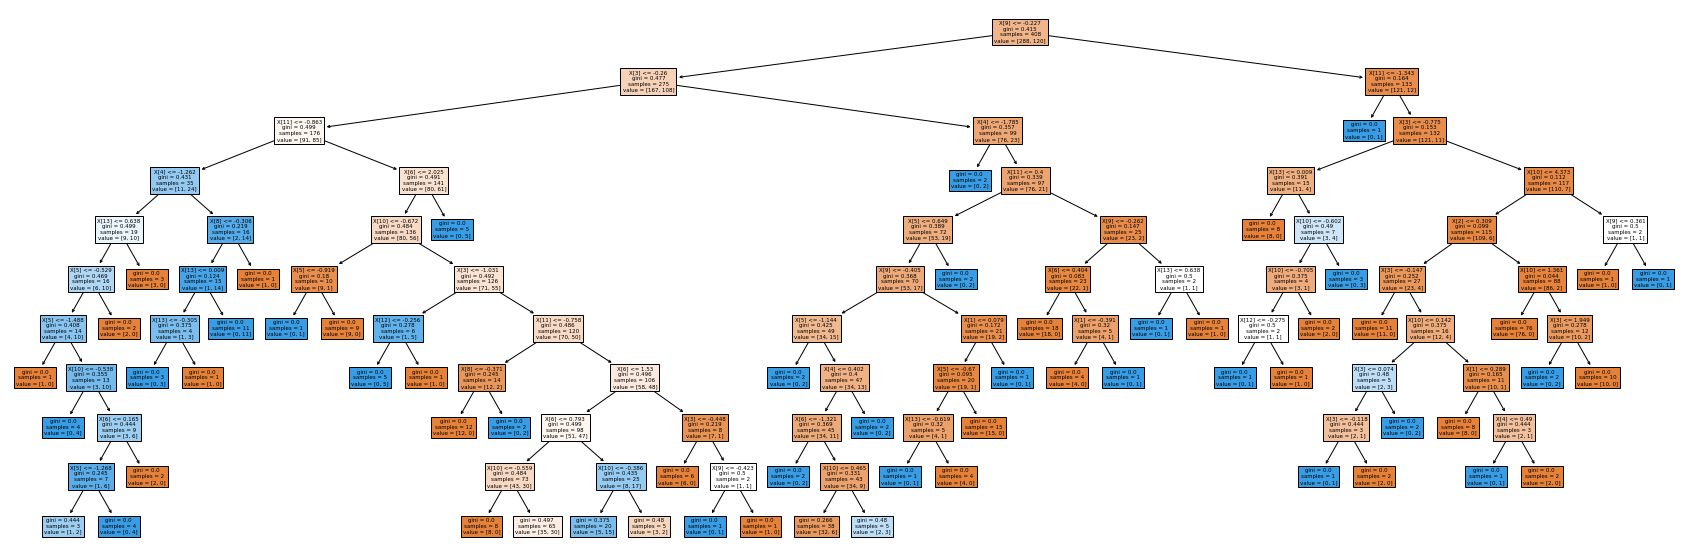

In [113]:
from sklearn import tree
plt.figure(figsize=(30,10))
tree.plot_tree(model[4],filled=True)
plt.show()

### With cost complexity pruning

In [114]:
path = model[4].cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [115]:
from sklearn.tree import DecisionTreeClassifier
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04021144399217619


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

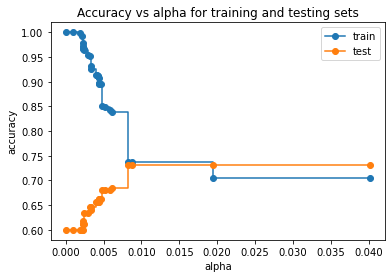

In [116]:
train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [117]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.006)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.006, random_state=0)

In [118]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print('testing accuracy score',accuracy_score(Y_test,pred))
print('training accuracy score',clf.score(X_train,Y_train))
print('\nconfusion matrix')
confusion_matrix(Y_test,pred)

testing accuracy score 0.68
training accuracy score 0.8431372549019608

confusion matrix


array([[102,  26],
       [ 30,  17]], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

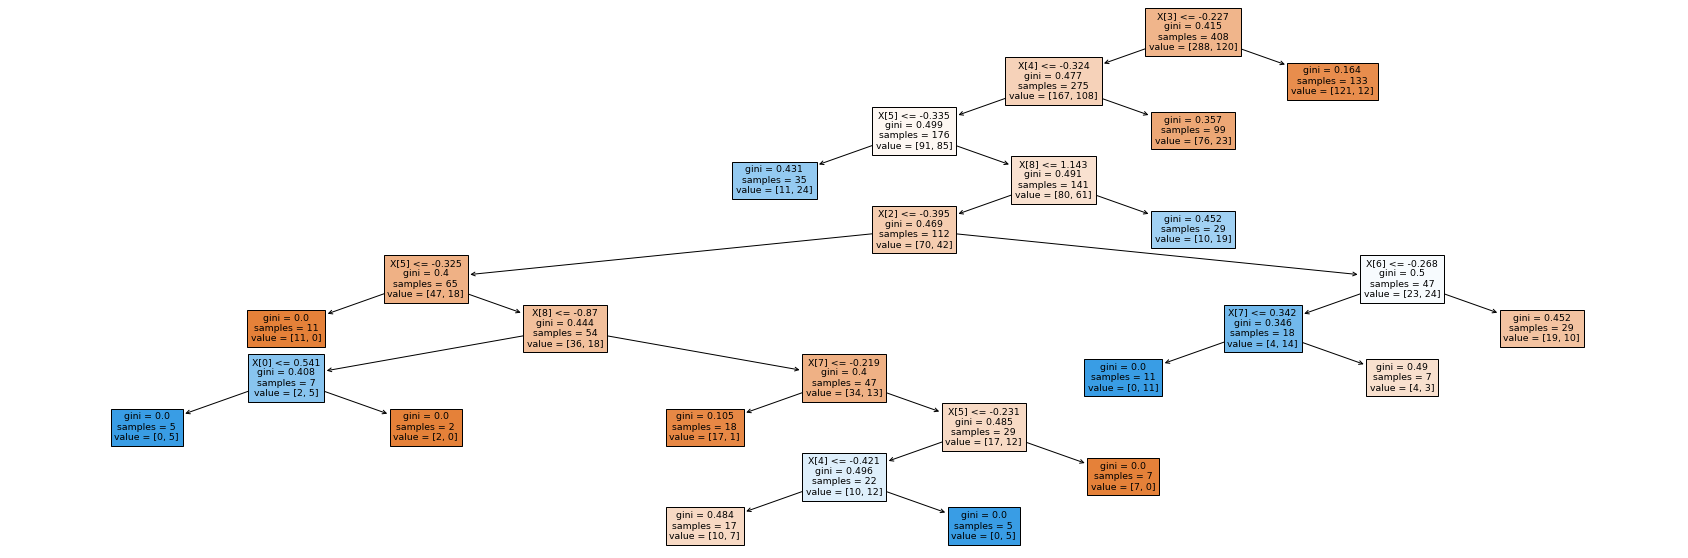

In [31]:
from sklearn import tree
plt.figure(figsize=(30,10))
tree.plot_tree(clf,filled=True)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

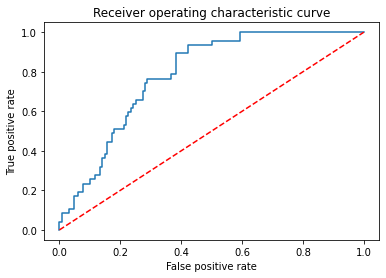

In [32]:
log_roc_auc=roc_auc_score(Y_test,model[0].predict(X_test))
fpr,tpr,threshold=roc_curve(Y_test,model[0].predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic curve')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

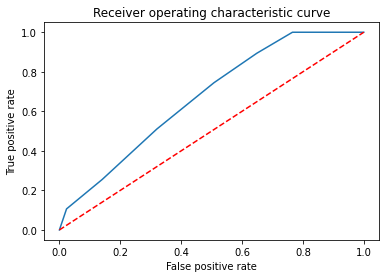

In [33]:
log_roc_auc=roc_auc_score(Y_test,model[1].predict(X_test))
fpr,tpr,threshold=roc_curve(Y_test,model[1].predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic curve')
plt.show()

### ROC for actual decisition tree

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

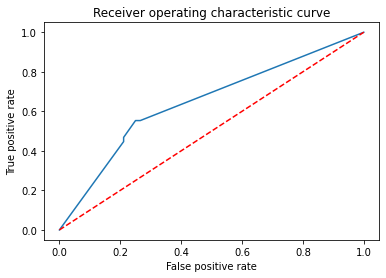

In [34]:
log_roc_auc=roc_auc_score(Y_test,model[4].predict(X_test))
fpr,tpr,threshold=roc_curve(Y_test,model[4].predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic curve')
plt.show()

### ROC for Post pruning decision tree with cost complexity pruning

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

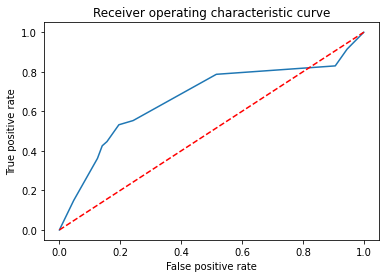

In [35]:
log_roc_auc=roc_auc_score(Y_test,clf.predict(X_test))
fpr,tpr,threshold=roc_curve(Y_test,clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic curve')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

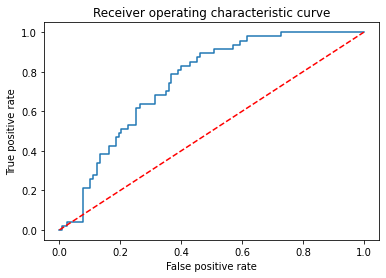

In [36]:
log_roc_auc=roc_auc_score(Y_test,model[5].predict(X_test))
fpr,tpr,threshold=roc_curve(Y_test,model[5].predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic curve')
plt.show()